# Protein rank bar chart with highlights

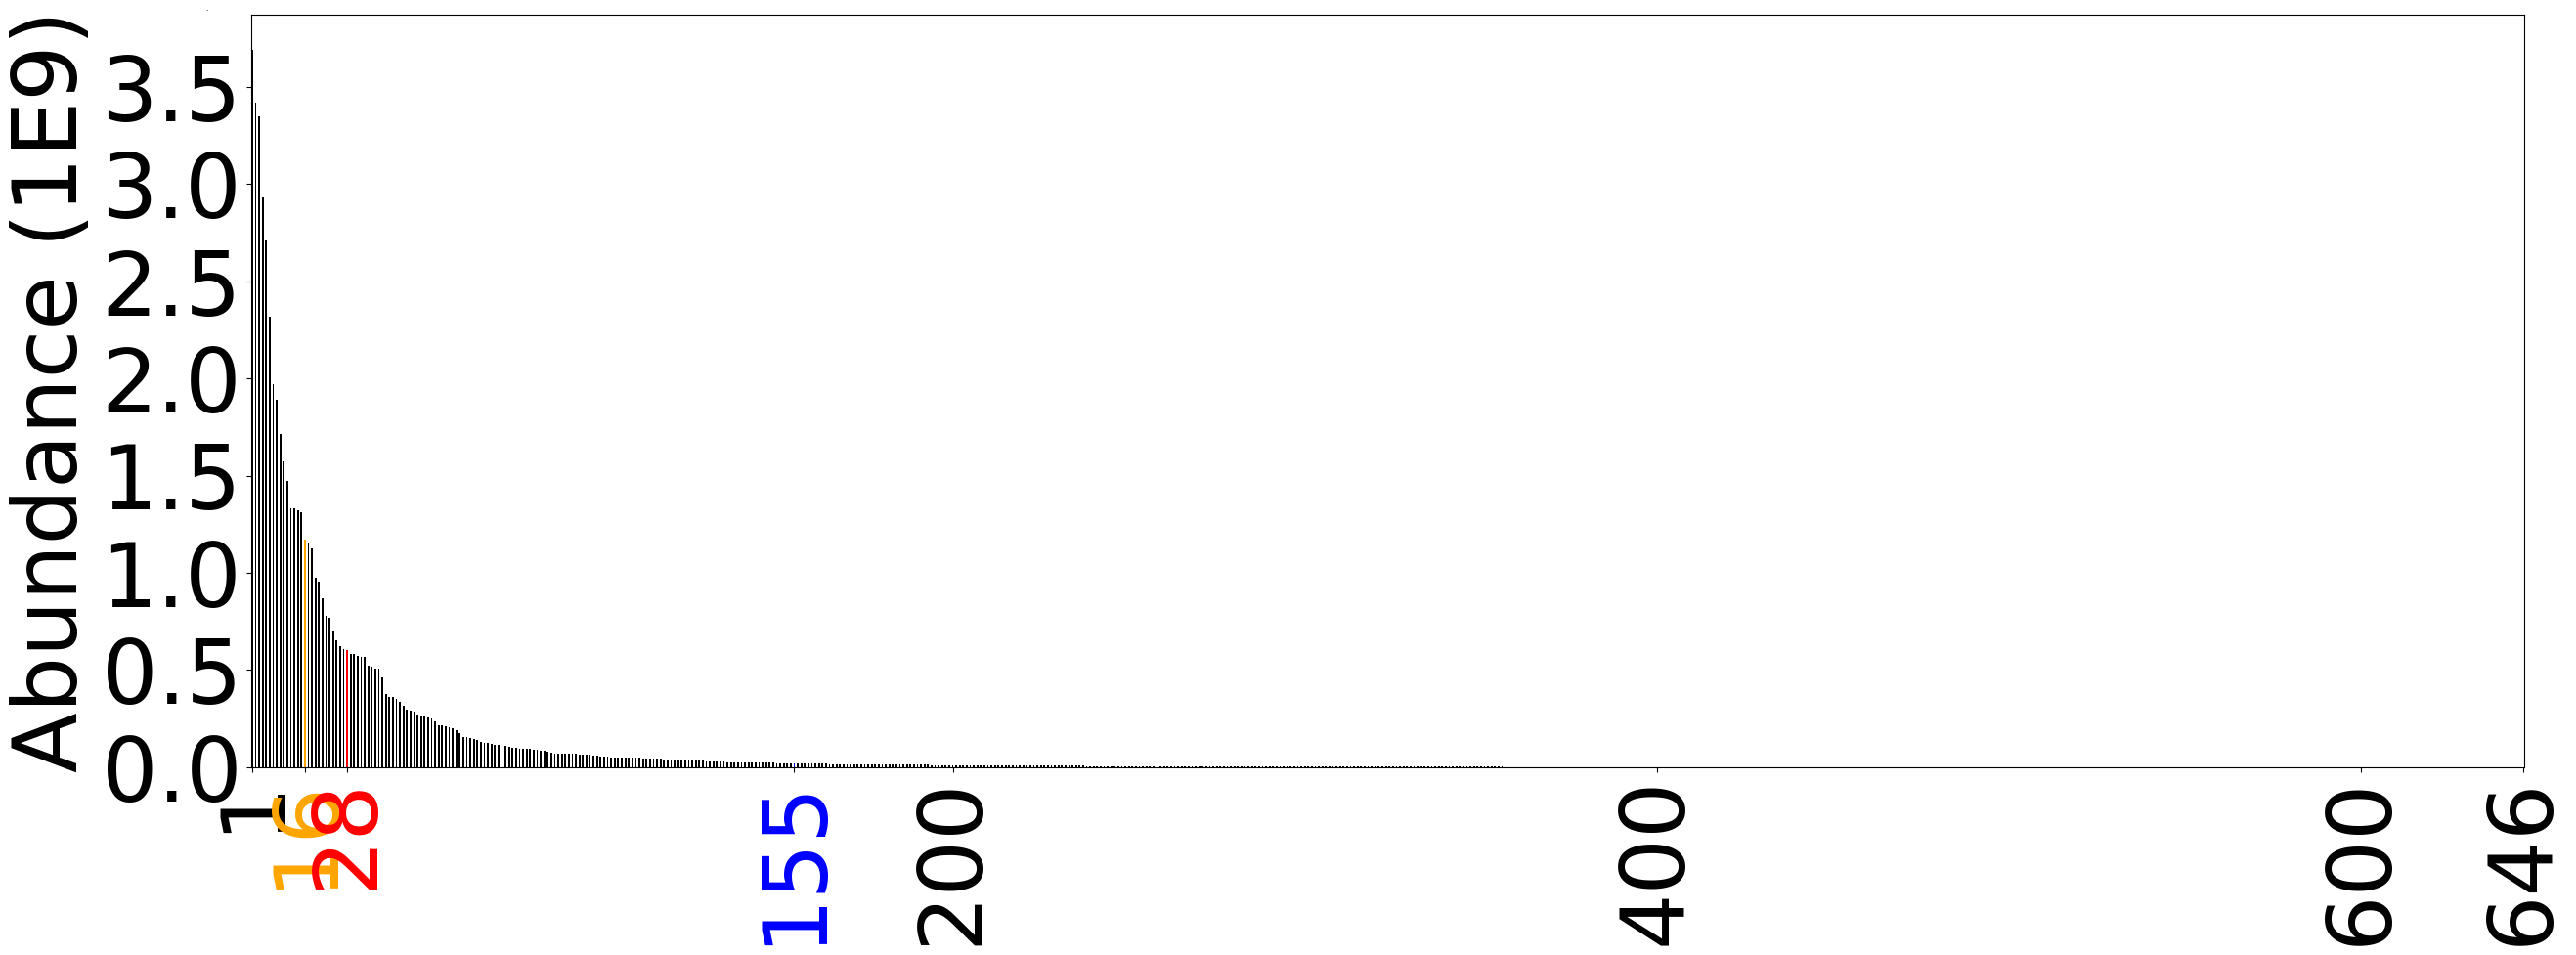

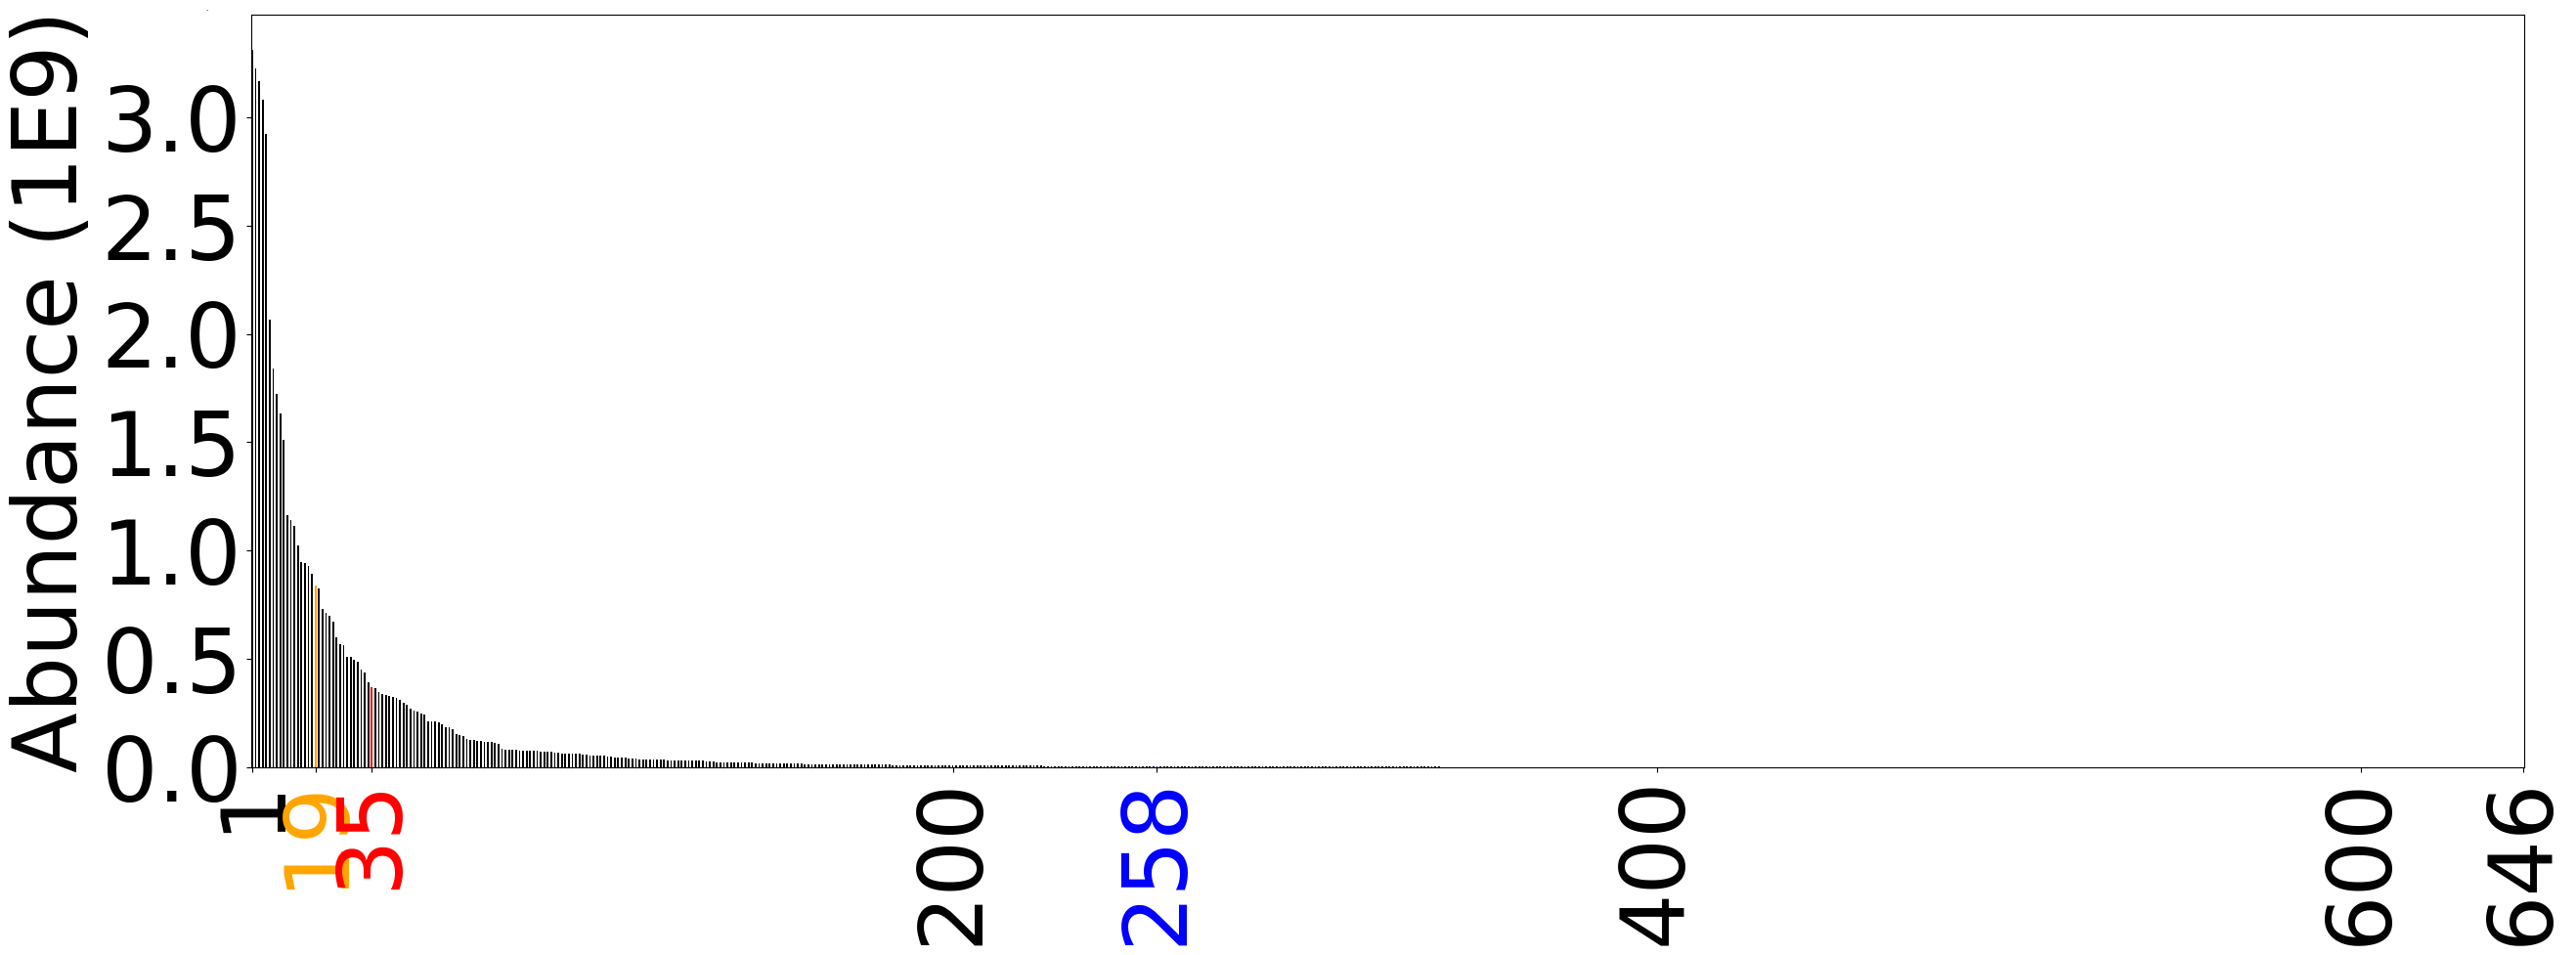

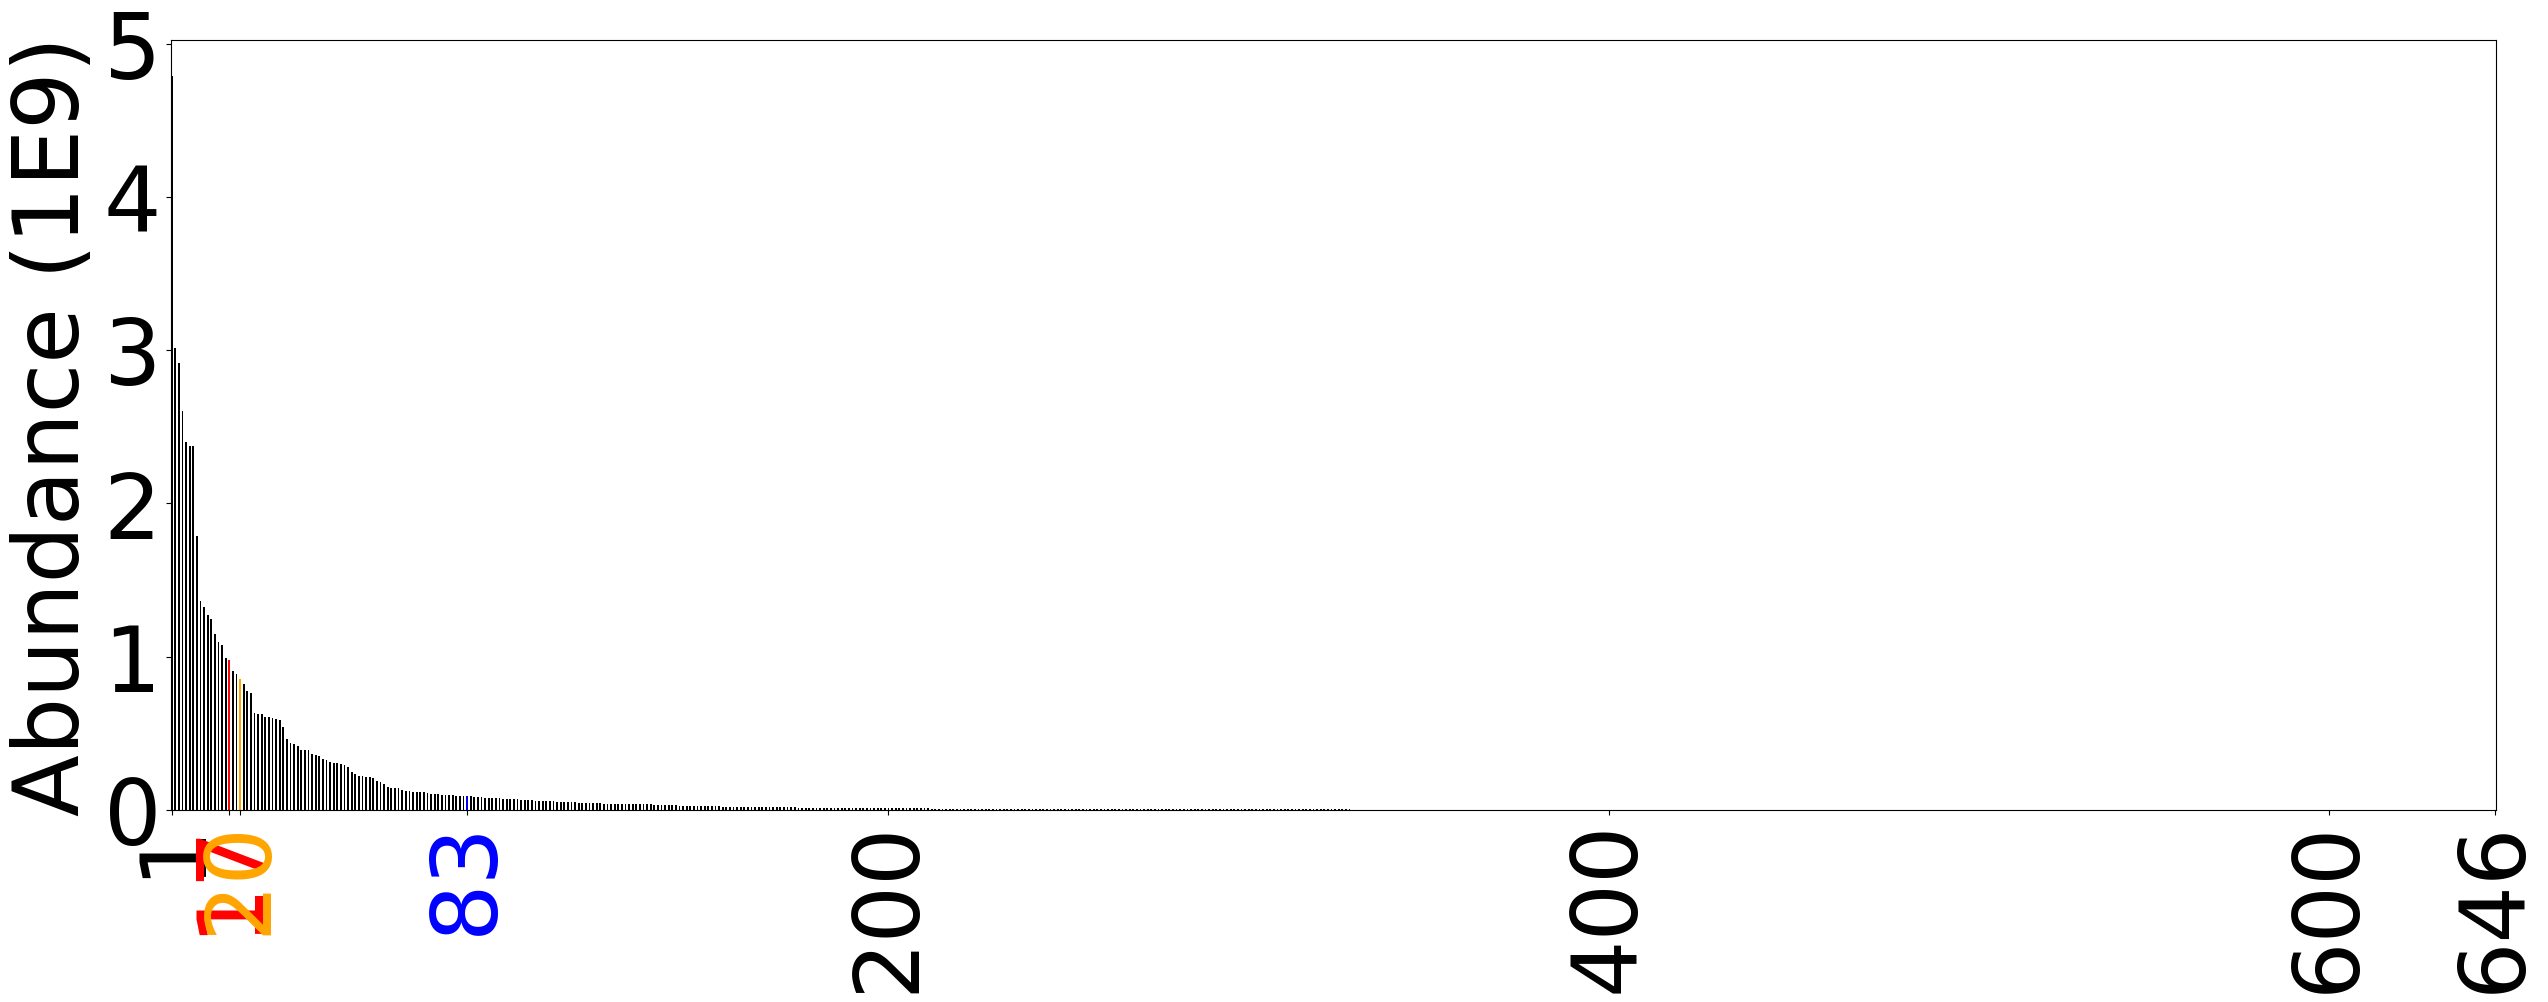

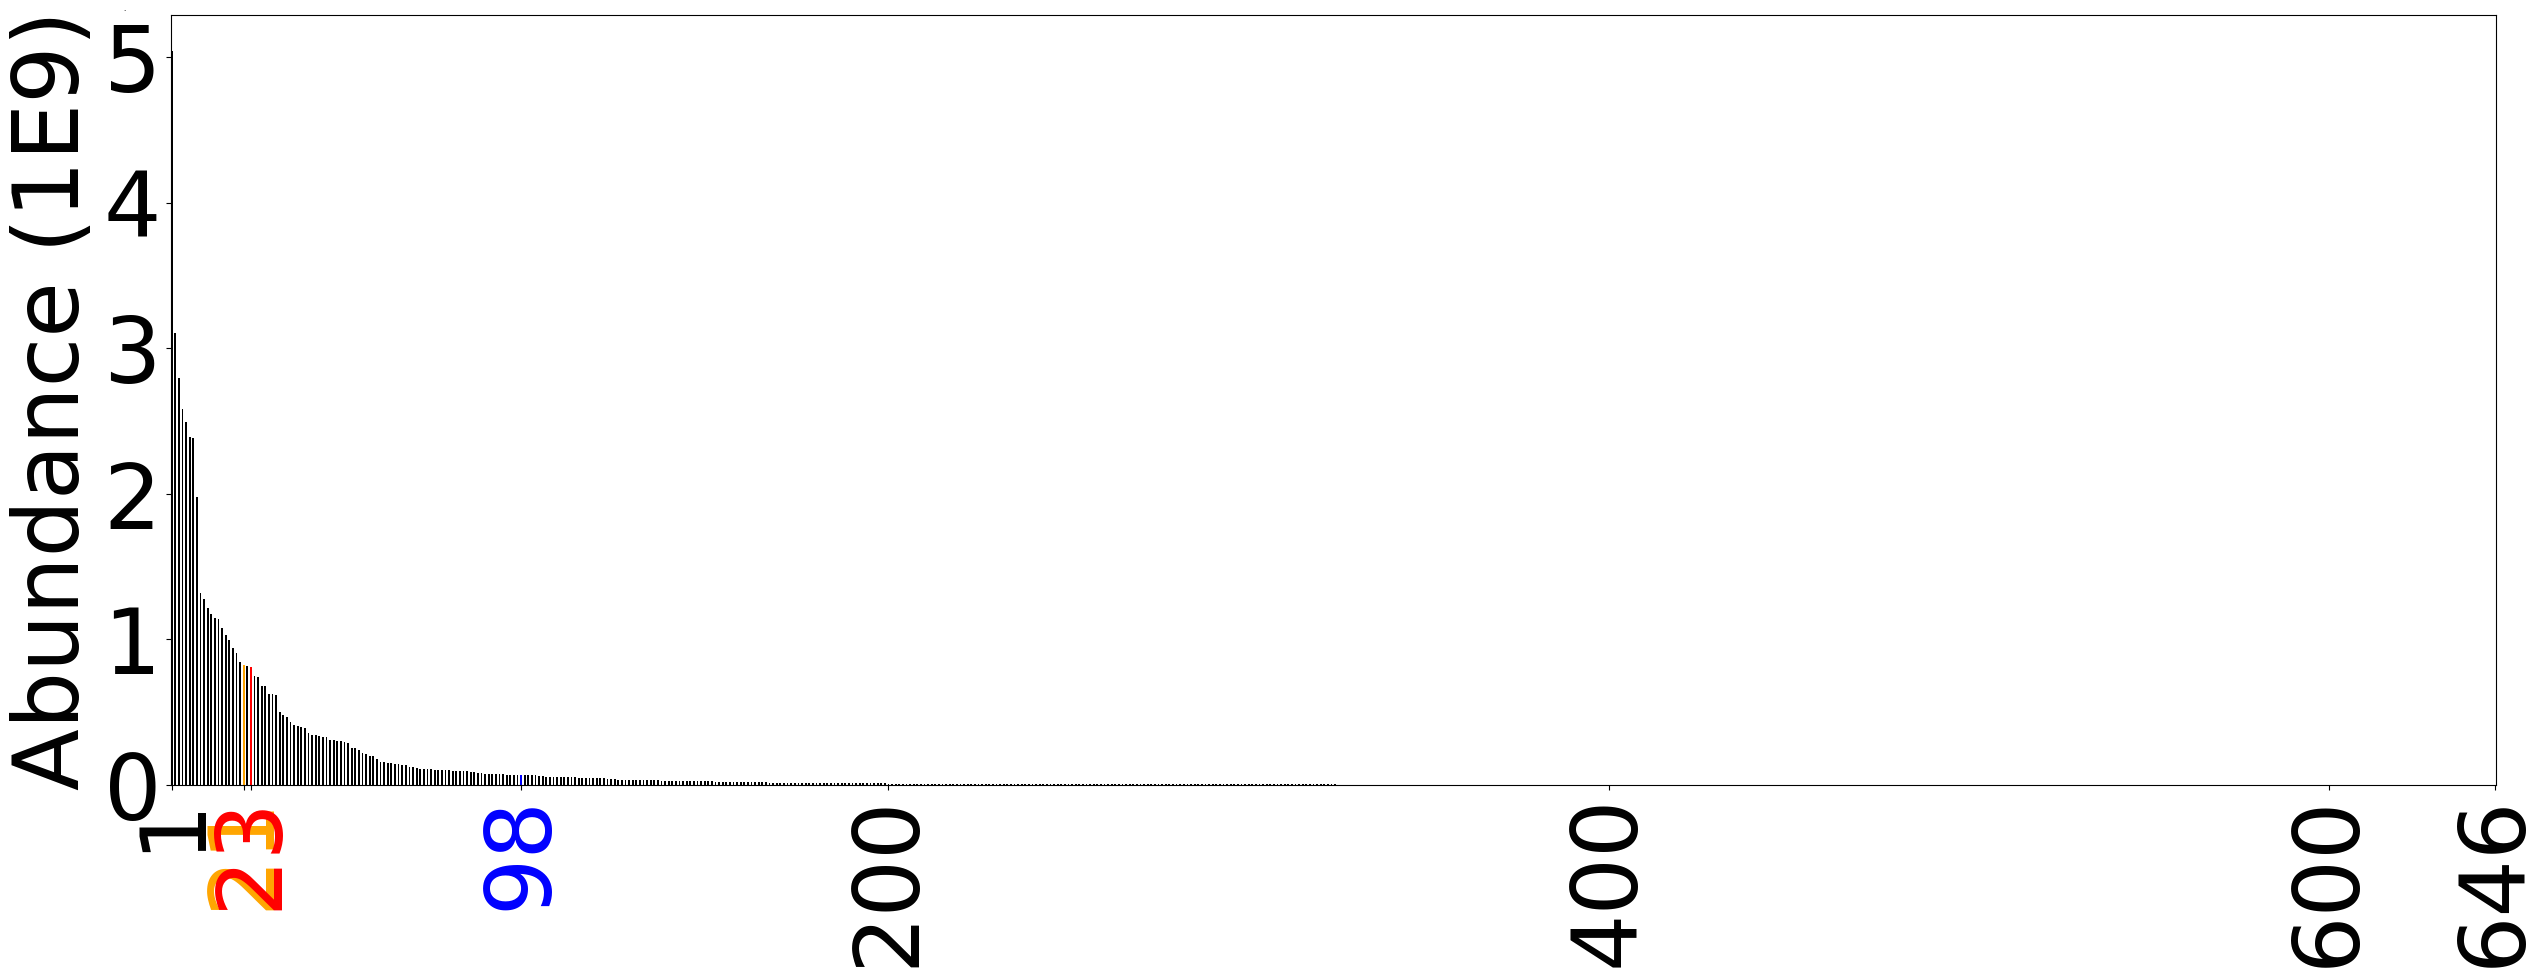

In [370]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load the data
data = pd.read_csv("Hilsa_scatter plot_PRVB.csv")

# Create the DataFrame 
df = pd.DataFrame(data)

# Highlight specific categories and their corresponding colors
highlighted_categories = [
    "P09227 Parvalbumin alpha (A1.1)", 
    "P09227 Parvalbumin alpha (A1.2)", 
    "P09227 Parvalbumin beta"
]
highlighted_colors = ["red", "orange", "blue"]  # Array for highlighted colors

font_size = 65

# Input categories for the loop
categories = ["AMe", "APa", "JMe", "JPa"]

# Loop through each category
for category in categories:
    # Sort the DataFrame by the current category in descending order
    df_sort = df.sort_values(by=category, ascending=False).reset_index(drop=True)
    
    # Assign colors based on the condition
    def assign_color(description):
        if description in highlighted_categories:
            return highlighted_colors[highlighted_categories.index(description)]
        return "black"

    df_sort[f"{category}-Color"] = df_sort["Description"].apply(assign_color)
    
    # Assign ranks to highlighted categories
    df_sort[f"{category}-Rank"] = df_sort.apply(
        lambda x: f"{df_sort[df_sort['Description'] == x['Description']].index[0] + 1}" 
                  if x[f"{category}-Color"] != "black" else "", axis=1
    )
    
    # Extract highlighted positions
    highlighted_positions = [
        (df_sort[df_sort["Description"] == cat].index[0], assign_color(cat))
        for cat in highlighted_categories if cat in df_sort["Description"].values
    ]
    
    # Add specific positions for xticks
    additional_positions = [0, 199, 399, 599, len(df_sort) - 1]  # Ensure 0-based indexing
    xticks_positions = sorted(set([pos for pos, _ in highlighted_positions] + additional_positions))
    
    # Prepare tick labels, colors, and font sizes
    xticks_labels = []
    xticks_colors = []
    xticks_font_sizes = []
    # for pos in xticks_positions:
    #     if any(pos == hp[0] for hp in highlighted_positions):
    #         color = next(hp[1] for hp in highlighted_positions if hp[0] == pos)
    #         xticks_labels.append(df_sort.iloc[pos]["Description"])  # Label with Description
    #         xticks_colors.append(color)
    #         xticks_font_sizes.append(font_size)
    #     else:
    #         xticks_labels.append("")
    #         xticks_colors.append("black")
    #         xticks_font_sizes.append(font_size)


    for pos in xticks_positions:
        if any(pos == hp[0] for hp in highlighted_positions):
            # Find the color and set font size 30 for highlighted positions
            color = next(hp[1] for hp in highlighted_positions if hp[0] == pos)
            xticks_labels.append(str(pos + 1))  # 1-based index
            xticks_colors.append(color)
            xticks_font_sizes.append(font_size)
        else:
            # Set font size 10 for non-highlighted positions
            xticks_labels.append(str(pos + 1))
            xticks_colors.append("black")
            xticks_font_sizes.append(font_size)
    
    # Plotting the bar chart
    plt.figure(figsize=(30, 10))
    plt.bar(range(len(df_sort)), df_sort[category], 
            color=df_sort[f"{category}-Color"], width=0.5)
    
    # Title and axis labels
    plt.xlabel("", fontsize=font_size)
    plt.ylabel("Abundance (1E9)", fontsize=font_size)
    
    # Add a legend
    # handles = [
    #     plt.Line2D([0], [0], color=highlighted_colors[i], lw=4, label=highlighted_categories[i])
    #     for i in range(len(highlighted_categories))
    # ]
    # plt.legend(handles=handles, fontsize=font_size)
    
    # Remove left margin by adjusting plot limits
    plt.margins(x=0)
    
    # Add x-axis tick marks
    plt.xticks(
        xticks_positions,  # Directly use positions
        xticks_labels,     # Corresponding labels
        fontsize=font_size,
        rotation=90
    )
    
    # Set tick colors and font sizes
    ax = plt.gca()
    for tick_label, tick_color, tick_font_size in zip(ax.get_xticklabels(), xticks_colors, xticks_font_sizes):
        tick_label.set_color(tick_color)
        tick_label.set_fontsize(tick_font_size)
    
    # Adjust y-axis scientific notation position and font size
    ax.yaxis.get_offset_text().set_fontsize(0)  # Set font size
    ax.yaxis.get_offset_text().set_position((-0.02, -0.05))  # Adjust position
    
    # Adjust y-axis font size
    plt.yticks(fontsize=font_size)
    
    # Save the chart as an SVG file
    plt.savefig(f"{category}_bar_chart.svg", format="svg")
    
    # Display the chart
    plt.show()


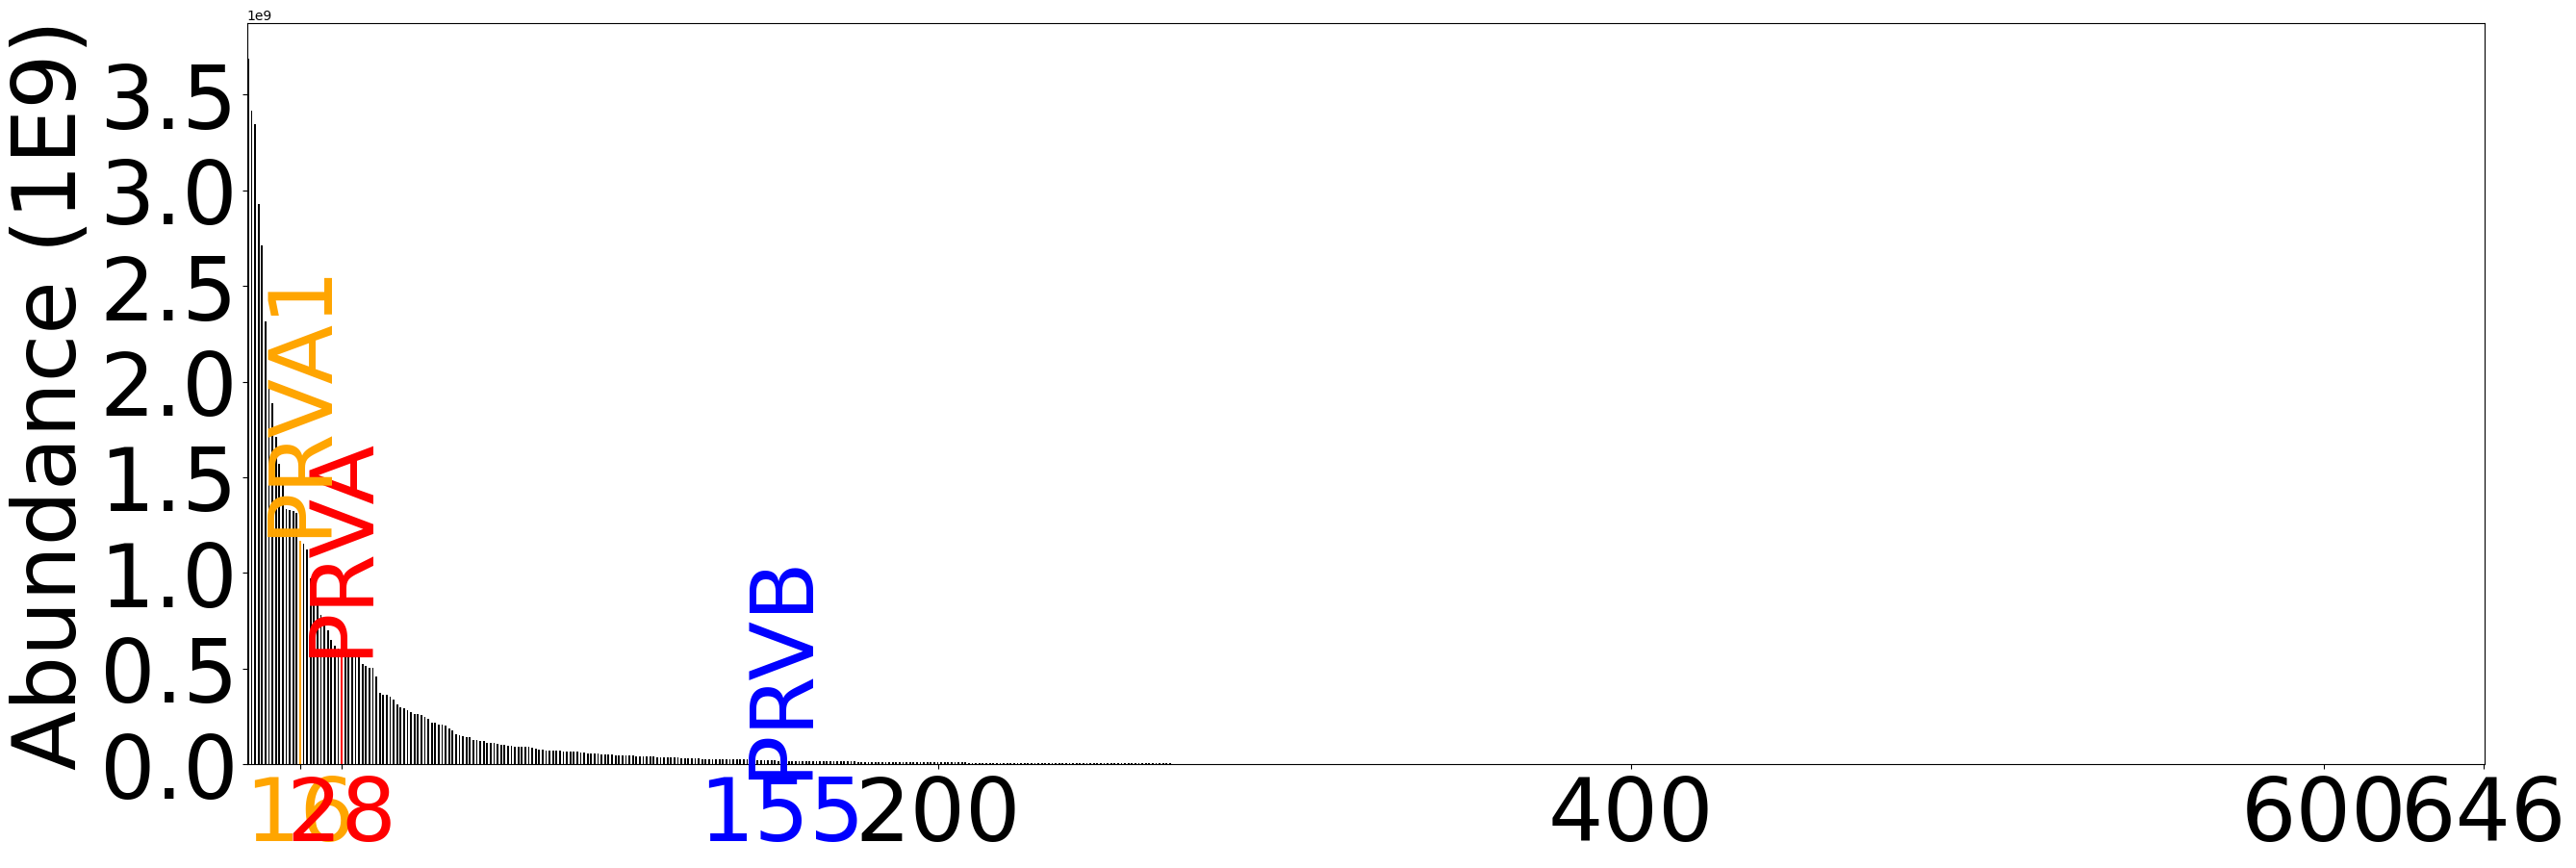

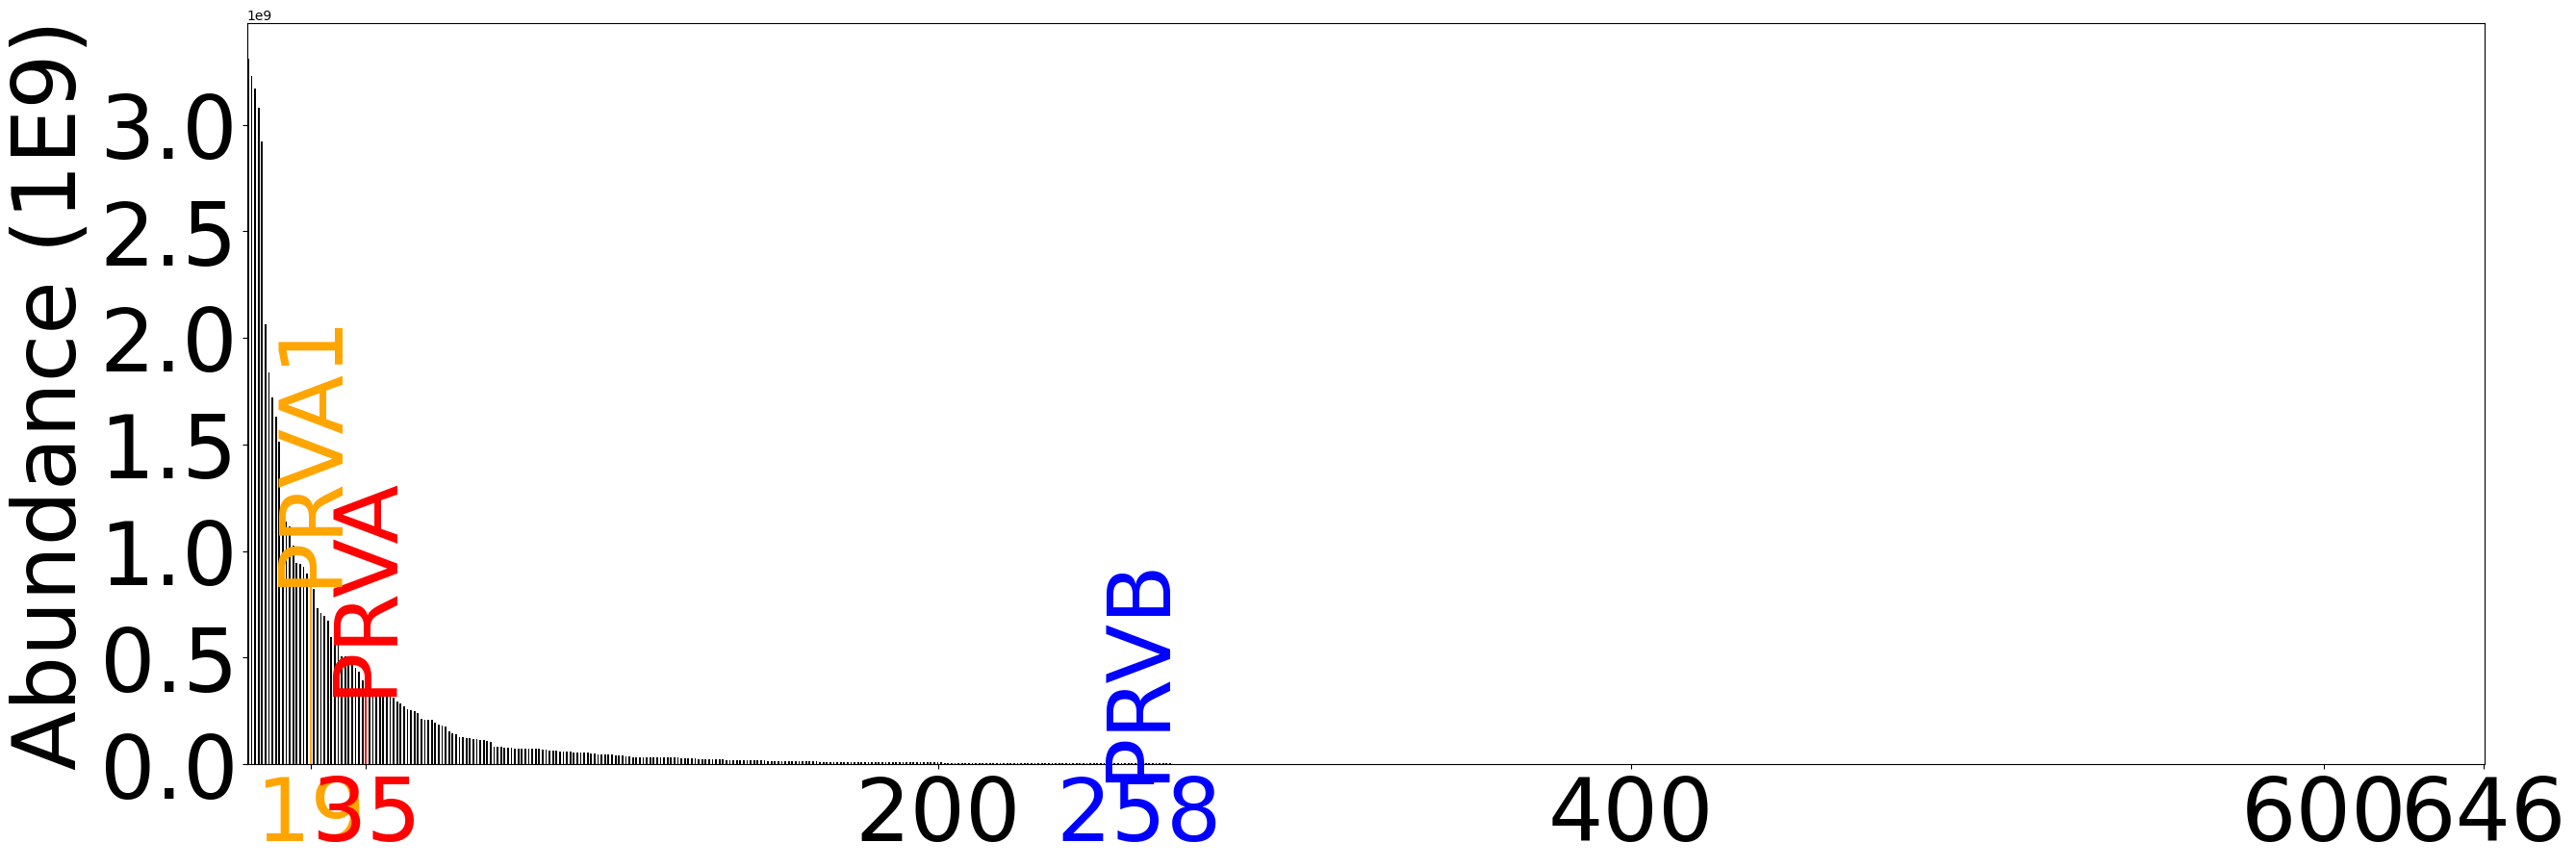

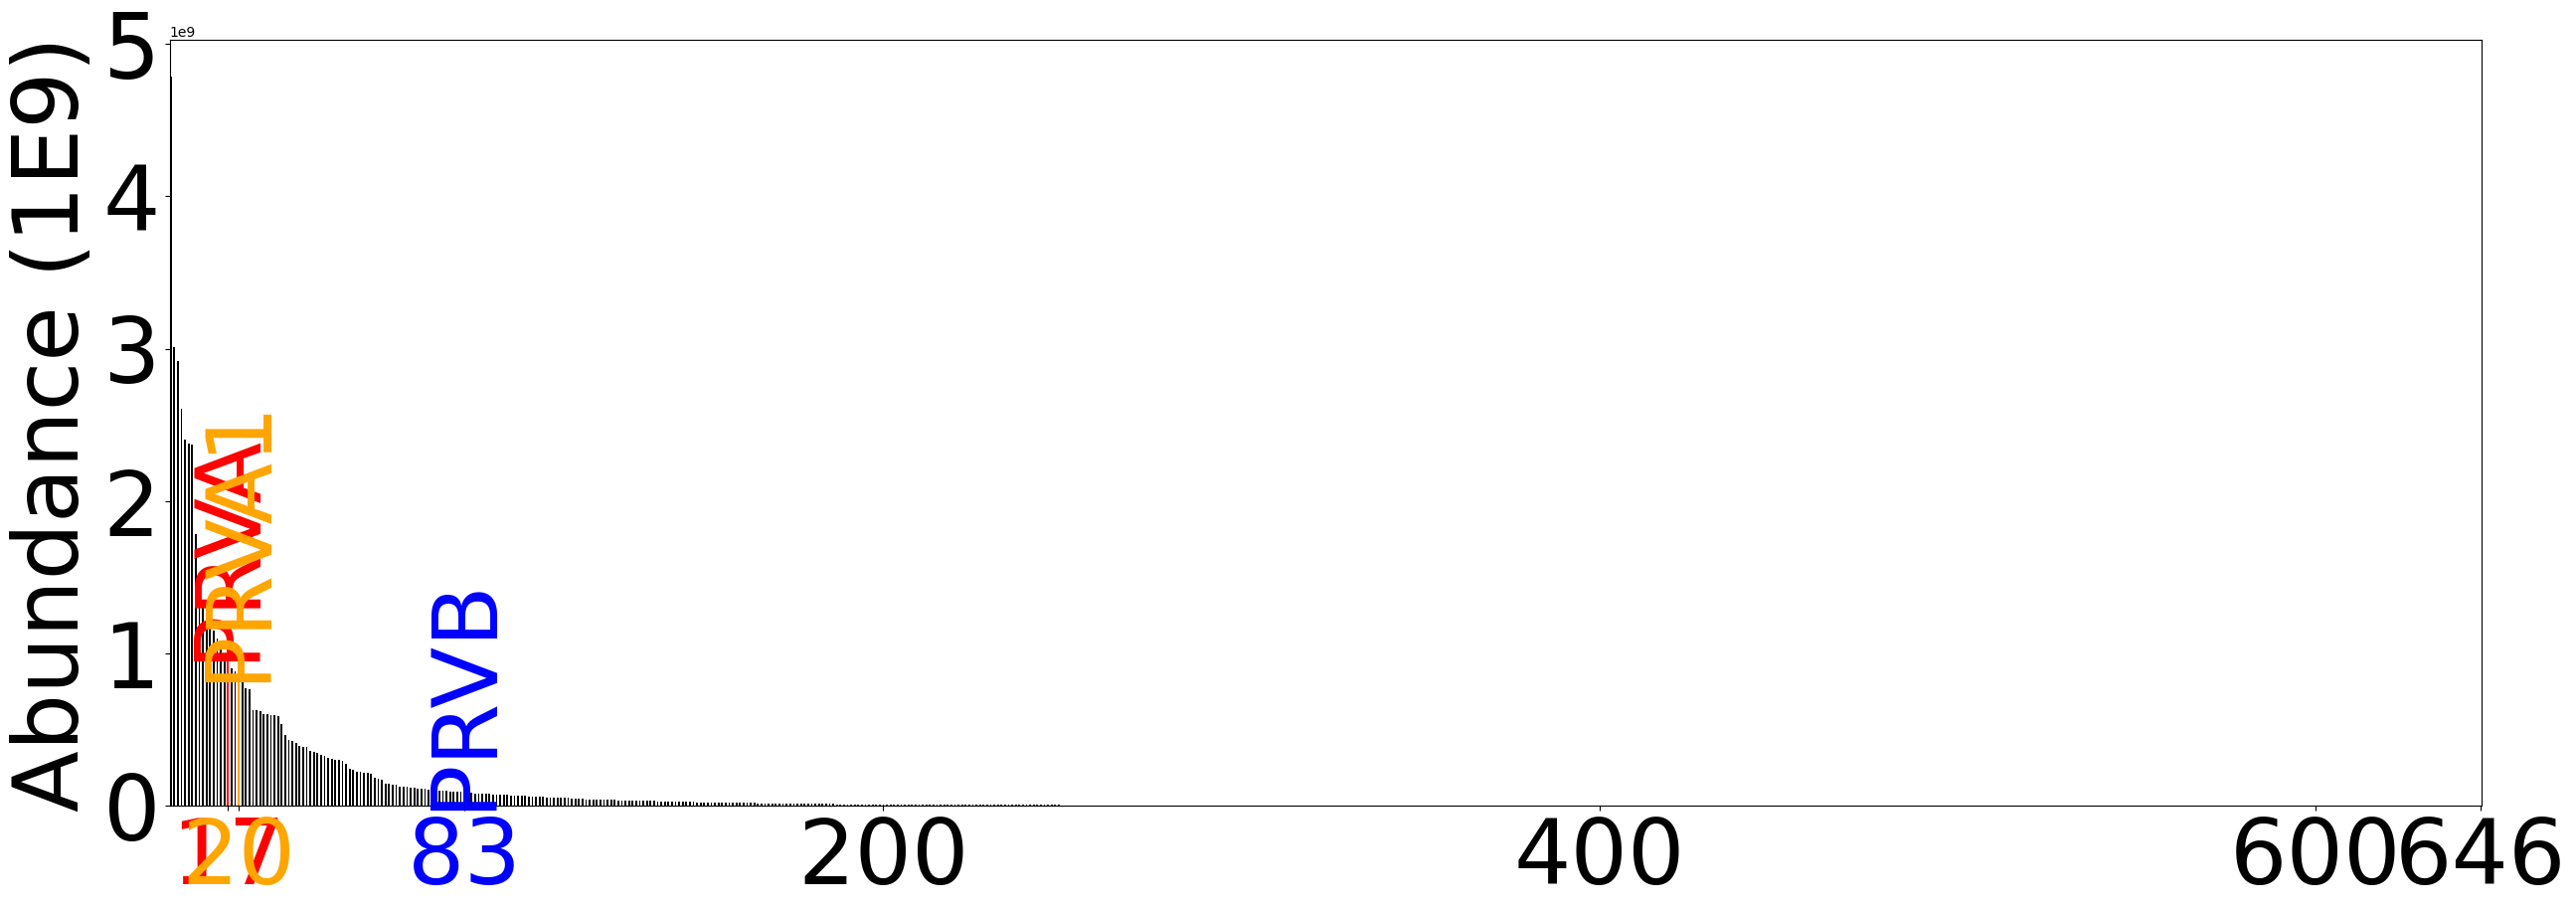

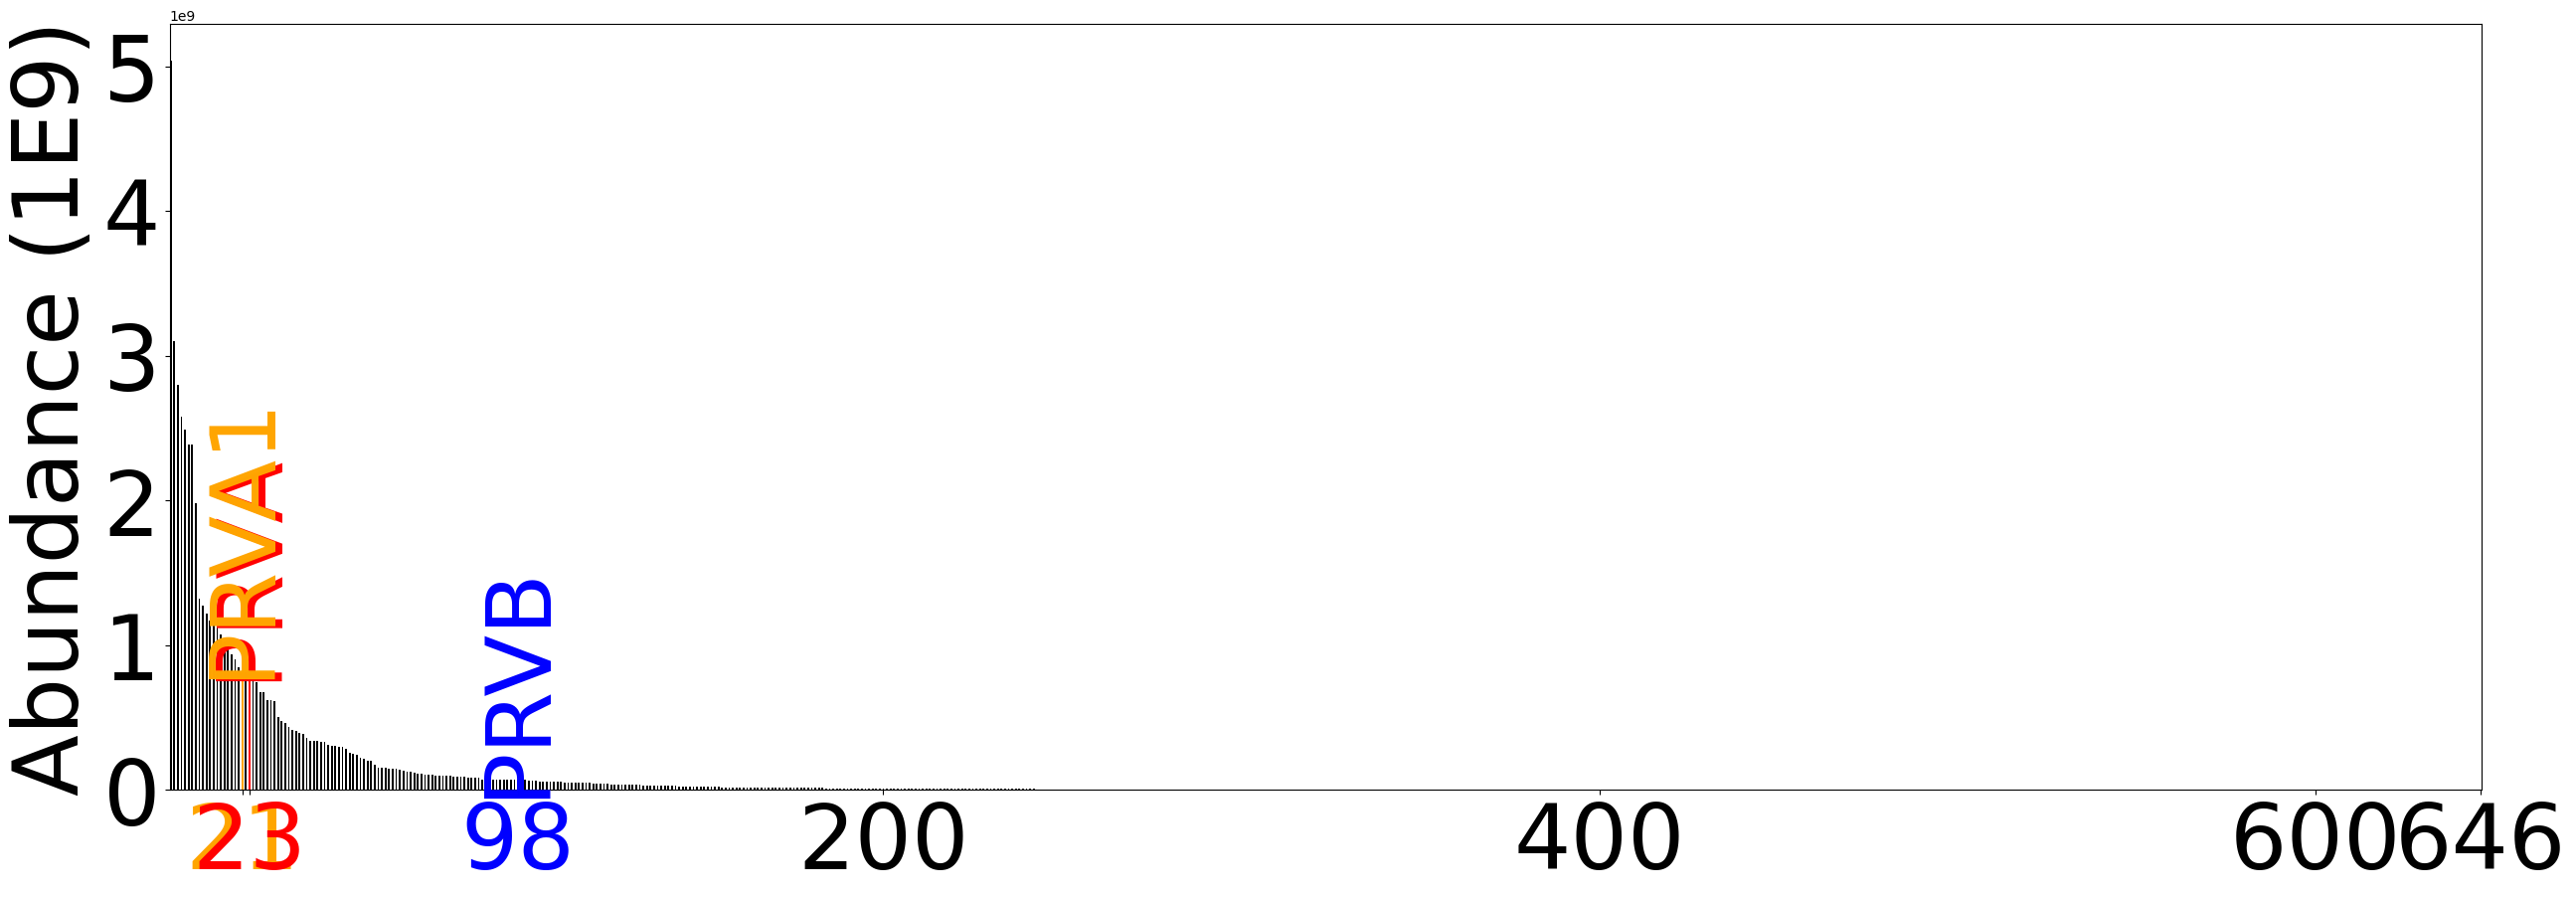

In [394]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load the data
data = pd.read_csv("Hilsa_scatter plot_PRVB.csv")

# Create the DataFrame 
df = pd.DataFrame(data)

# Highlight specific categories and their corresponding colors
highlighted_categories = [
    "P09227 Parvalbumin alpha (A1.1)", 
    "P09227 Parvalbumin alpha (A1.2)", 
    "P09227 Parvalbumin beta"
]
highlighted_colors = ["red", "orange", "blue"]  # Array for highlighted colors

font_size = 65

# Input categories for the loop
categories = ["AMe", "APa", "JMe", "JPa"]

# Loop through each category
for category in categories:
    # Sort the DataFrame by the current category in descending order
    df_sort = df.sort_values(by=category, ascending=False).reset_index(drop=True)
    
    # Assign colors based on the condition
    def assign_color(description):
        if description in highlighted_categories:
            return highlighted_colors[highlighted_categories.index(description)]
        return "black"

    df_sort[f"{category}-Color"] = df_sort["Description"].apply(assign_color)
    
    # Extract highlighted positions
    highlighted_positions = [
        (df_sort[df_sort["Description"] == cat].index[0], assign_color(cat))
        for cat in highlighted_categories if cat in df_sort["Description"].values
    ]
    
    # Add specific positions for xticks
    additional_positions = [
                            # 0, 
                            199, 
                            399, 
                            599, 
                            len(df_sort) - 1
                           ]  # Ensure 0-based indexing
    xticks_positions = sorted(set([pos for pos, _ in highlighted_positions] + additional_positions))
    
    # Prepare tick labels, colors, and font sizes
    xticks_labels = []
    xticks_colors = []
    xticks_font_sizes = []
    for pos in xticks_positions:
        if any(pos == hp[0] for hp in highlighted_positions):
            # Find the color and set font size 30 for highlighted positions
            color = next(hp[1] for hp in highlighted_positions if hp[0] == pos)
            xticks_labels.append(str(pos + 1))  # 1-based index
            xticks_colors.append(color)
            xticks_font_sizes.append(font_size)
        else:
            # Set font size 10 for non-highlighted positions
            xticks_labels.append(str(pos + 1))
            xticks_colors.append("black")
            xticks_font_sizes.append(font_size)
    
    # Plotting the bar chart
    plt.figure(figsize=(30, 10))
    plt.bar(range(len(df_sort)), df_sort[category], 
            color=df_sort[f"{category}-Color"], width=0.5)
    
    # Title and axis labels
    plt.xlabel("", fontsize=font_size)
    plt.ylabel("Abundance (1E9)", fontsize=font_size)
    
    # Remove left margin by adjusting plot limits
    plt.margins(x=0)
    
    # Add x-axis tick marks
    plt.xticks(
        xticks_positions,  # Directly use positions
        xticks_labels,     # Corresponding labels
        fontsize=font_size,
        rotation=0
    )
    
    # Set tick colors and font sizes
    ax = plt.gca()
    for tick_label, tick_color, tick_font_size in zip(ax.get_xticklabels(), xticks_colors, xticks_font_sizes):
        tick_label.set_color(tick_color)
        tick_label.set_fontsize(tick_font_size)
    
    # Highlighted annotations with arrows and labels
    for pos, color in highlighted_positions:
        bar_height = df_sort.iloc[pos][category]
        # Map descriptions to updated text
        description_map = {
            "P09227 Parvalbumin alpha (A1.1)": "PRVA",
            "P09227 Parvalbumin alpha (A1.2)": "PRVA1",
            "P09227 Parvalbumin beta": "PRVB"
        }
        updated_description = description_map.get(df_sort.iloc[pos]["Description"], df_sort.iloc[pos]["Description"])
        plt.text(pos, bar_height + 0.1 * bar_height, updated_description, 
                 ha='center', color=color, fontsize=65, rotation=90)
    
    # Adjust y-axis font size
    plt.yticks(fontsize=font_size)
    
    # Save the chart as an SVG file
    plt.savefig(f"{category}_bar_chart.svg", format="svg")
    
    # Display the chart
    plt.show()
